# Intro

This notebook is a demonstration of `plot_dat`, an addition to turboSETI to allow us to see what it is "seeing" as it processes a cadence. If you are new to using turboSETI, please refer to Shane Smith's [turboSETI tutorial](https://github.com/UCBerkeleySETI/turbo_seti/blob/master/tutorial/turboSETI_tutorial.ipynb). To use `plot_dat`, we will first run turboSETI on some data collected from Green Bank Telescope shortly before the Perseverance Rover landed on Mars. The single coarse channel files can be found here: http://blpd18.ssl.berkeley.edu/gb_mars/ (total size: 292 MB).

This code was added to turboSETI in version 2.0.17, and uses code from [blimpy](https://github.com/UCBerkeleySETI/blimpy) version 2.0.7, so let's check that the code we will be using is up to date. If your versions of blimpy and turboSETI are not up to date, they can be updated with `pip install git+https://github.com/UCBerkeleySETI/blimpy` and `pip install git+https://github.com/UCBerkeleySETI/turbo_seti`

In [1]:
import blimpy
blimpy.__version__

bshuf filter already loaded, skip it.
lz4 filter already loaded, skip it.
zfp filter already loaded, skip it.


'2.0.11'

In [2]:
import turbo_seti
turbo_seti.__version__

'2.0.19'

In [3]:
import os
import wget
import glob

DATADIR = "/tmp/turbo_seti_data/" # the directory where the data will be saved

# check that the directory exists
if not os.path.isdir(DATADIR):
    os.mkdir(DATADIR)
    
# download the data to DATADIR
URL_DIR = "http://blpd18.ssl.berkeley.edu/gb_mars/single_coarse_channel/"
FILE_LIST = ["spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_66265_DIAG_Mars2020_0011.rawspec.0000_diced.h5",
             "spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_66578_DIAG_Mars_0012.rawspec.0000_diced.h5", 
             "spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_66892_DIAG_Mars2020_0013.rawspec.0000_diced.h5",
             "spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_67205_DIAG_Mars_0014.rawspec.0000_diced.h5",
             "spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_67519_DIAG_Mars2020_0015.rawspec.0000_diced.h5",
             "spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_67832_DIAG_Mars_0016.rawspec.0000_diced.h5"]
h5_files = glob.glob(DATADIR+"*.h5")

for file in FILE_LIST:
    if DATADIR+file not in h5_files:
        wget.download(URL_DIR+file, DATADIR)
print("Done downloading data.")

# get rid of any pre-existing files from a prior run
for x_file in sorted(os.listdir(DATADIR)):
    x_type = x_file.split(".")[-1]
    if x_type != "h5":
        os.remove(DATADIR + x_file)

Done downloading data.


## Finding Events

After downloading the data, we will perform the usual doppler drift search for signals with drift rates of $\pm 4$Hz/second and a minimum signal to noise ratio of 10. 

In [4]:
# glob will create a list of specific files in a directory. In this case, any file ending in .h5.
filelist = glob.glob(DATADIR + "*.h5")

# iterate ofer the files in the list
for file in filelist:
    
    #Execute turboSETI in the terminal
    console = "turboSETI " + file + " -M 4 -s 10 -o " + DATADIR
    os.system(console)

print("turboSETI search complete")

turboSETI search complete


Now that we have ran turboSETI on the six observations, we will use find_event_pipeline to find events that are present in the ON observations. We will be using a filter level of 3, so the only signals we will detect are the ones that are present in the ON observations and absent in all OFF observations. 

In [5]:
from turbo_seti.find_event.find_event_pipeline import find_event_pipeline

# a list of all the .dat files that turboSETI produced
dat_list = glob.glob(DATADIR+"*.dat")
dat_list.sort()

# this writes the .dat files into a .lst, as required by the find_event_pipeline
with open(DATADIR + "dat_files.lst", "w") as f:
    for item in dat_list:
        f.write("%s\n" % item)
        
PATH_CSVF = "maxdrift4_snr10_f3.csv"
find_event_pipeline(DATADIR + "dat_files.lst",
                    filter_threshold=3,
                    number_in_cadence=len(dat_list),
                    user_validation=False,
                    saving=True,
                    csv_name=PATH_CSVF)


************   BEGINNING FIND_EVENT PIPELINE   **************

Assuming the first observation is an ON
find_event_pipeline: file = spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_66265_DIAG_Mars2020_0011.rawspec.0000_diced.dat, tstart = 59256.76695601852, source_name = DIAG_Mars2020
find_event_pipeline: file = spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_66578_DIAG_Mars_0012.rawspec.0000_diced.dat, tstart = 59256.770578703705, source_name = DIAG_Mars
find_event_pipeline: file = spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_66892_DIAG_Mars2020_0013.rawspec.0000_diced.dat, tstart = 59256.77421296296, source_name = DIAG_Mars2020
find_event_pipeline: file = spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_67205_DIAG_Mars_0014.rawspec.0000_diced.dat, tstart = 59256.77783564815, source_name = DIAG_Mars
find_event_pipeline: file = spliced_blc10111213141516o7o0212223242526o7o031323334353637_gup

,TopHitNum,DriftRate,SNR,Freq,ChanIndx,FreqStart,FreqEnd,CoarseChanNum,FullNumHitsInRange,FileID,...,MJD,RA,DEC,DELTAT,DELTAF,Hit_ID,status,in_n_ons,RFI_in_range,delta_t
1,2,-0.267862,2897.933580,8414.468992,378799,8414.470626,8414.467363,0,2785705,spliced_blc10111213141516o7o0212223242526o7o03...,...,59256.766956018517,0h00m00s,0d00m00s,18.253611,-2.793968,DIAG_MARS2020_1,on_table_1,2,0,0.0
4,2,-0.296561,4275.645354,8414.468813,378863,8414.470447,8414.467184,0,3660474,spliced_blc10111213141516o7o0212223242526o7o03...,...,59256.774212962962,0h00m00s,0d00m00s,18.253611,-2.793968,DIAG_MARS2020_1,on_table_2,,0,627.0
7,2,-0.315694,4164.026344,8414.468617,378933,8414.470252,8414.466988,0,3742255,spliced_blc10111213141516o7o0212223242526o7o03...,...,59256.781469907408,0h00m00s,0d00m00s,18.253611,-2.793968,DIAG_MARS2020_1,on_table_3,,0,1254.0


## Plotting events

Now that we have some events detected, we will plot them in the usual manner with plot_event_pipeline.

In [6]:
from turbo_seti.find_event.plot_event_pipeline import plot_event_pipeline

# we need to create a .lst of the .h5 files
filelist = glob.glob(DATADIR + "*.h5")
filelist.sort()

# write the file locations to a .lst
with open(DATADIR + "filelist.lst", "w") as f:
    for item in filelist:
        f.write("%s\n" % item)
        
# and finally we plot
plot_event_pipeline(PATH_CSVF, 
                    DATADIR + "filelist.lst", 
                    user_validation=False)

plot_event_pipeline: Opened file maxdrift4_snr10_f3.csv
plot_event_pipeline: file = spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_66265_DIAG_Mars2020_0011.rawspec.0000_diced.h5, tstart = 59256.76695601852, source_name = DIAG_Mars2020
plot_event_pipeline: file = spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_66578_DIAG_Mars_0012.rawspec.0000_diced.h5, tstart = 59256.770578703705, source_name = DIAG_Mars
plot_event_pipeline: file = spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_66892_DIAG_Mars2020_0013.rawspec.0000_diced.h5, tstart = 59256.77421296296, source_name = DIAG_Mars2020
plot_event_pipeline: file = spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_67205_DIAG_Mars_0014.rawspec.0000_diced.h5, tstart = 59256.77783564815, source_name = DIAG_Mars
plot_event_pipeline: file = spliced_blc10111213141516o7o0212223242526o7o031323334353637_guppi_59256_67519_DIAG_Mars2020_0015.rawspec.0000_diced

# Plot all hits

These images that you produced are the ones that you are familiar with seeing from turboSETI, where the candidate signal is plotted over the waterfall plot. Now lets take a look at what it is that turboSETI is seeing as searches for hits.

First, let's take import plot_dat and take a look at what needs to be passed into it. 

In [7]:
from turbo_seti.find_event.plot_dat import plot_dat
plot_dat?

Signature:
plot_dat(
    dat_list_string,
    fils_list_string,
    candidate_event_table_string,
    outdir=None,
    check_zero_drift=False,
    alpha=1,
    color='black',
    window=None,
)
Docstring:
Makes a plot similar to the one produced by 
plot_candidate_events, but also includes the hits 
detected, in addition to the candidate signal.

Calls `plot_hit_candidate` and `make_plot`

Arguments
----------
dat_list_string : str
    List of .dat files in the cadence.
fils_list_string : str
    List of filterbank or .h5 files in the cadence.
candidate_event_table_string : str
    The string name of a .csv file that contains the
    list of events at a given filter level, created as
    output from find_event_pipeline.py. 
outdir : str, optional
    Path to the directory where the plots will be saved to. 
    The default is None, which will result in the plots being 
    saved to the directory where the .dat file are located.
check_zero_drift : bool, optional
     A True/False flag th

From the docstring, we can see that we have already made all of the required inputs by running a doppler drift search. 

To reduce computation time, let's look at frequency range the hits were detected in. Once we know where the hits are showing up, we can pass plot_dat over the range and it will show us where the hits are showing up. A good choice for a frequency window to make a plot is a width of 2kHZ, as this will give us enough room to see a signal with a drift rate of 4Hz/second go from one side of the plot to the other during the entire observation. 

In [8]:
from turbo_seti import find_event as find
import numpy as np
dat_files = glob.glob(DATADIR + "*.dat")

min_hit = 1e9
max_hit = 0

for file in dat_files:
    tbl = find.read_dat(file)
    min_freq, max_freq = min(tbl["Freq"]), max(tbl["Freq"])
    if min_freq < min_hit:
        min_hit = min_freq
    if max_freq > max_hit:
        max_hit = max_freq

print("Lowest frequency hit:  ", min_hit)
print("Highext frequency hit: ", max_hit)

plot_range = 2000*1e-6 # a 2000Hz width, adjusted to be in units of MHz

freq_range = np.arange(np.round(min_hit, 1), np.round(max_hit, 1)+0.1, plot_range)

Lowest frequency hit:   8414.443606
Highext frequency hit:  8415.219636


After generating the plots, you will be able to see that there are a black plot overlaid where turboSETI detected a hit. Some of these will line up with the candiate signals that we get from the find_event_pipeline, and some of them will be present in noise, and not match up with a meaningful signal. Additionally, there will be one plot that looks like it should have a candidate plot accompanying it, and you would be right! This data was taken of the 2020 Mars probe and the off target was Mars itself. The plot missing a candidate overlay is from a signal detection in what we ran as the "off" sources. It will certainly be detected if we pass a `on_off_first="OFF"` parameter into turboSETI. 

In [9]:
for center in freq_range:
    plot_dat(DATADIR + "dat_files.lst",
             DATADIR + "filelist.lst",
             PATH_CSVF,
             outdir=DATADIR,
             check_zero_drift=False,
             alpha=0.65, 
             color="black",
             window=(center-0.001, center+0.001))

plot_all_dat: source_name=DIAG_Mars2020
plot_all_dat: source_name=DIAG_Mars
plot_all_dat: source_name=DIAG_Mars2020
plot_all_dat: source_name=DIAG_Mars
plot_all_dat: source_name=DIAG_Mars2020
plot_all_dat: source_name=DIAG_Mars
There are no hits in this range. This will make 0 .png files
plot_all_dat: source_name=DIAG_Mars2020
plot_all_dat: source_name=DIAG_Mars
plot_all_dat: source_name=DIAG_Mars2020
plot_all_dat: source_name=DIAG_Mars
plot_all_dat: source_name=DIAG_Mars2020
plot_all_dat: source_name=DIAG_Mars
There are no hits in this range. This will make 0 .png files
plot_all_dat: source_name=DIAG_Mars2020
plot_all_dat: source_name=DIAG_Mars
plot_all_dat: source_name=DIAG_Mars2020
plot_all_dat: source_name=DIAG_Mars
plot_all_dat: source_name=DIAG_Mars2020
plot_all_dat: source_name=DIAG_Mars
There are no hits in this range. This will make 0 .png files
plot_all_dat: source_name=DIAG_Mars2020
plot_all_dat: source_name=DIAG_Mars
plot_all_dat: source_name=DIAG_Mars2020
plot_all_dat: sou

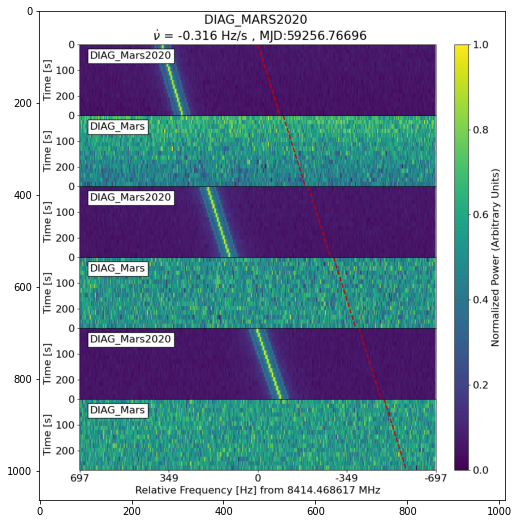

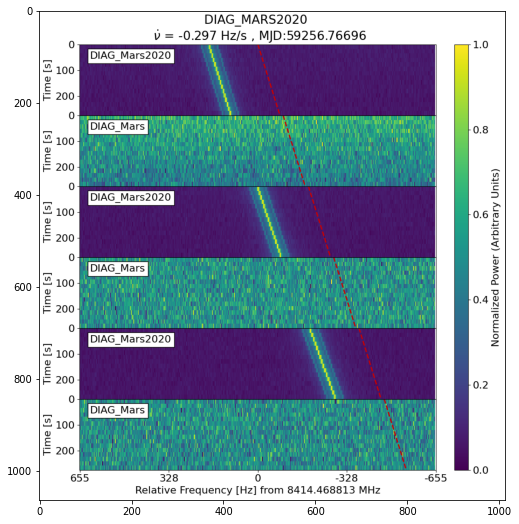

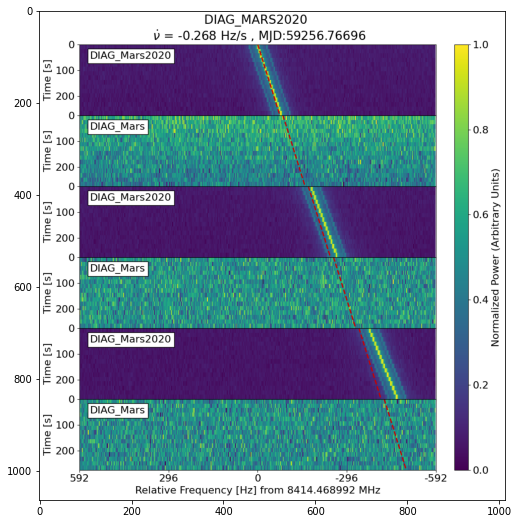

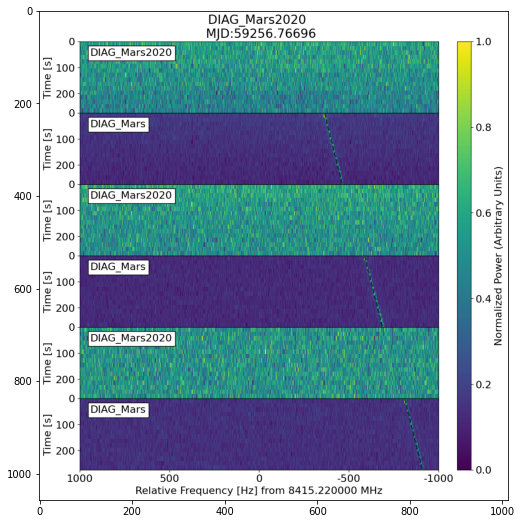

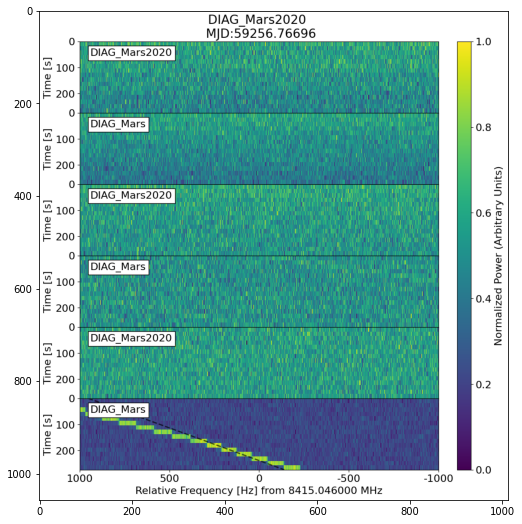

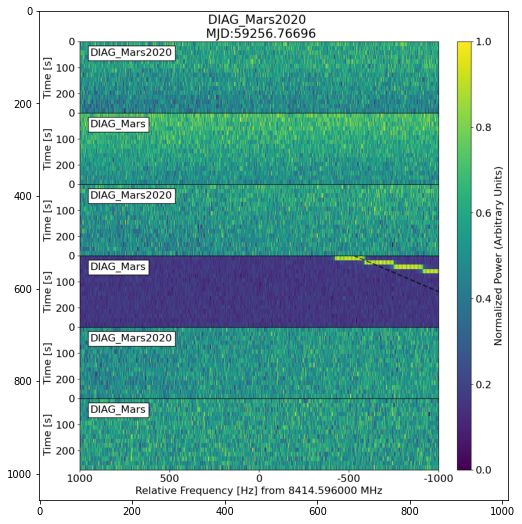

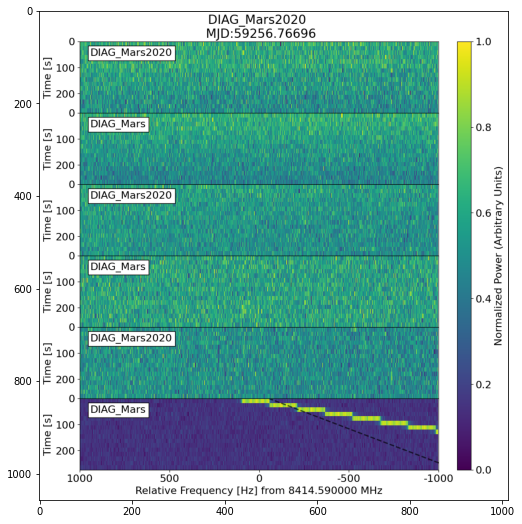

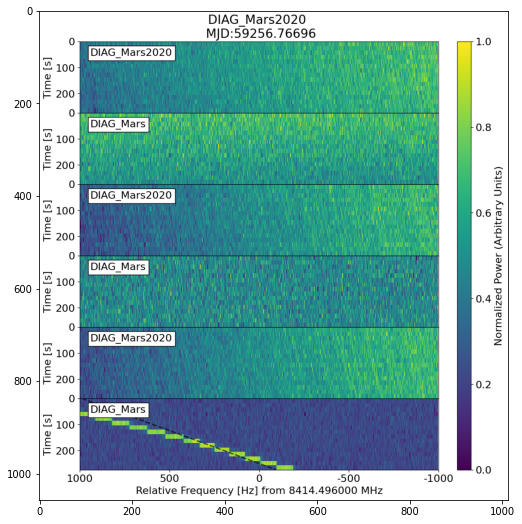

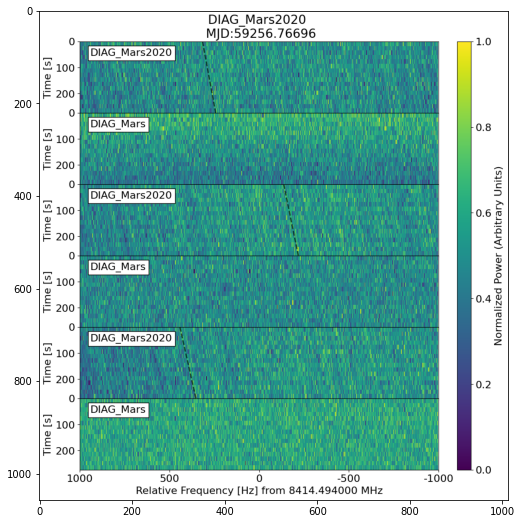

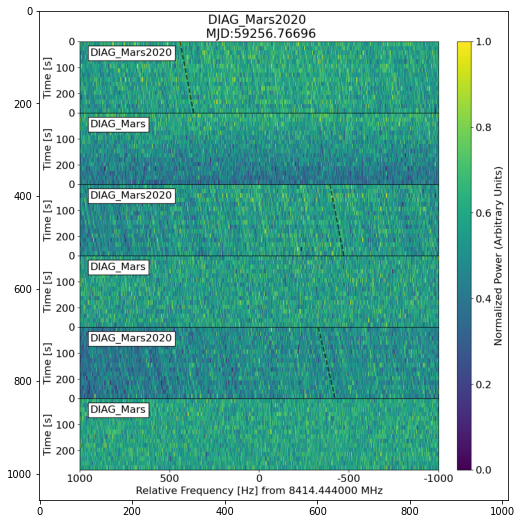

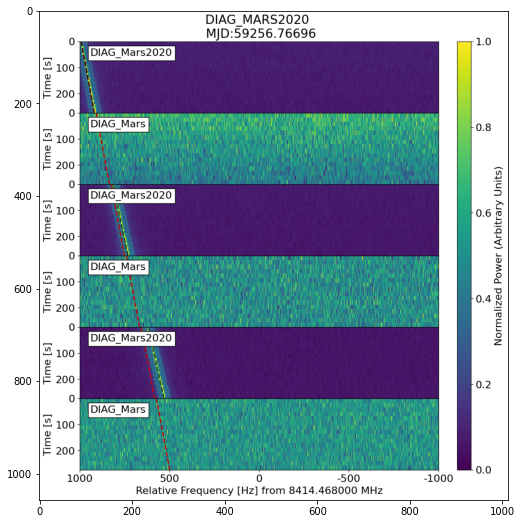

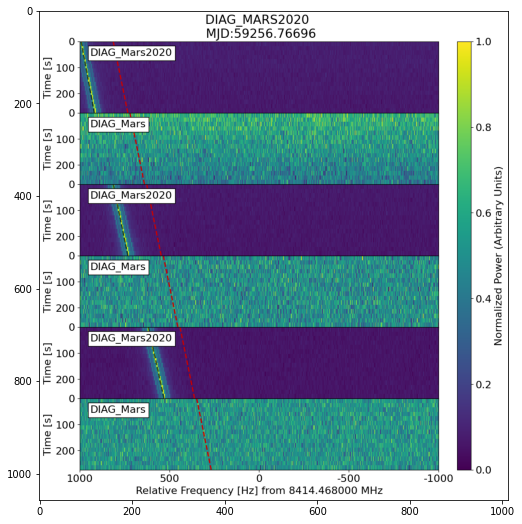

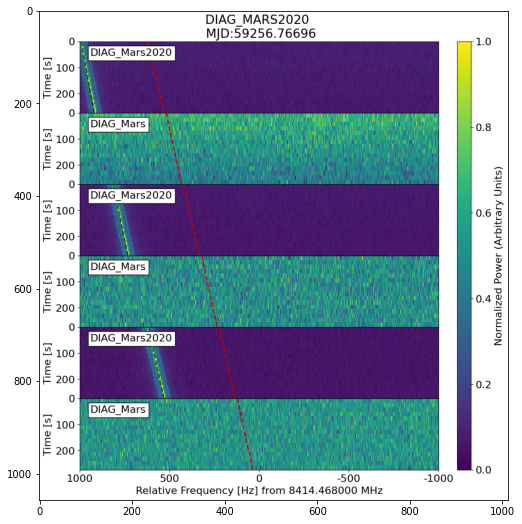

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
all_plots = glob.glob(DATADIR+"/*.png")
all_plots.sort(reverse=True)

for plot in all_plots:
    plt.figure(figsize=(12,9))
    plt.imshow(plt.imread(plot))
    